## Importing Important Libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',80)
pd.set_option('display.width',500)

# Importing Dataset

In [2]:
df=pd.read_csv('Data.csv')
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
df.shape

(25000, 24)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Checking missing values %

In [5]:
df.isna().sum()/len(df)*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

## Plotting heatmap

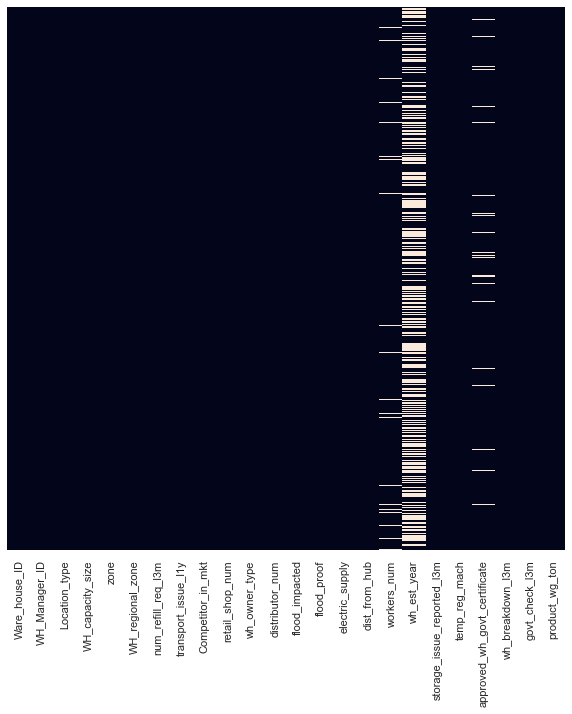

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False,yticklabels=False)
# plt.savefig('heatmap_missing_val_1.png')
plt.show()

# Imputation

### Three features have missing values . Thus , Imputing Median and Mode respectively

In [7]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])
df['workers_num']=df['workers_num'].fillna(df['workers_num'].median())

In [8]:
df.drop('wh_est_year',axis=1,inplace=True)

In [9]:
df.isna().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

## Dropping redundant columns

In [10]:
df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [11]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


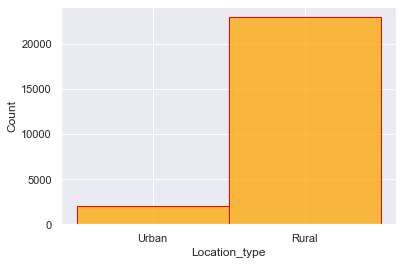

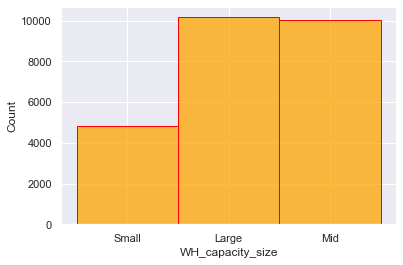

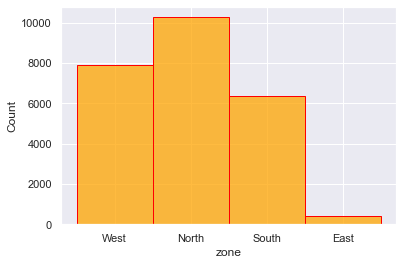

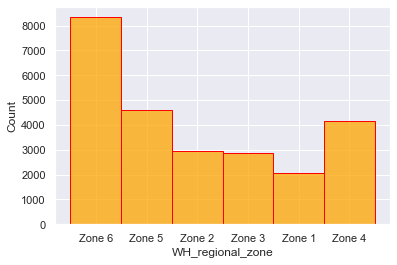

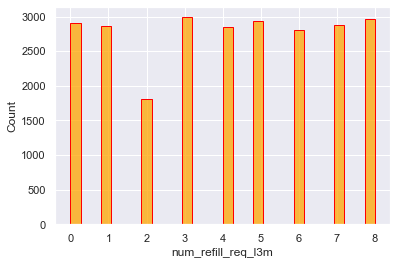

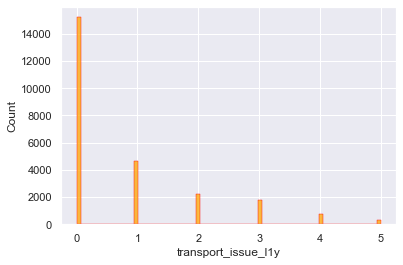

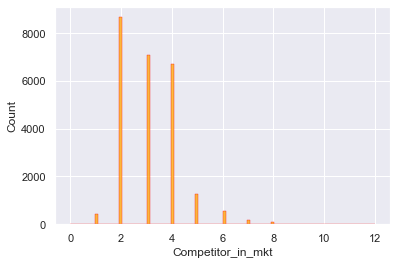

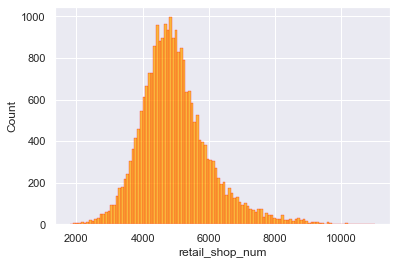

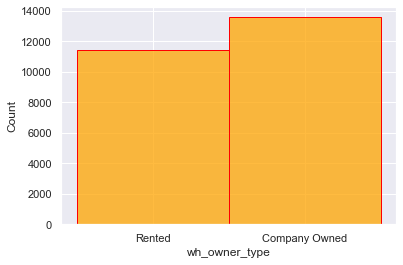

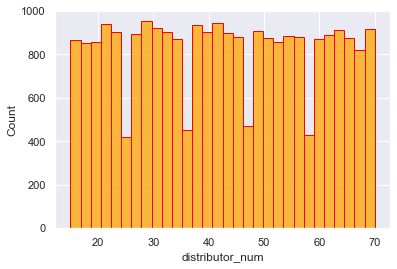

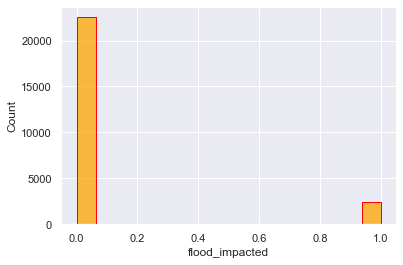

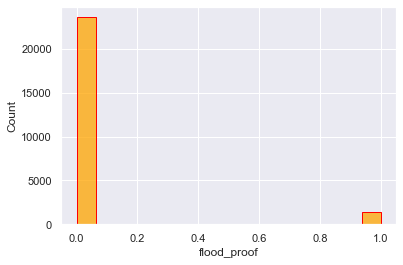

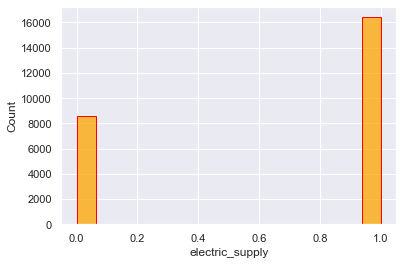

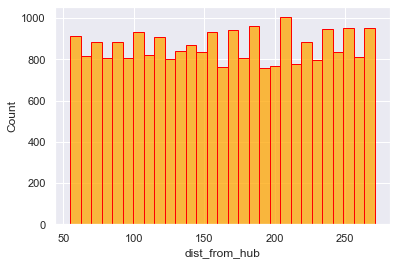

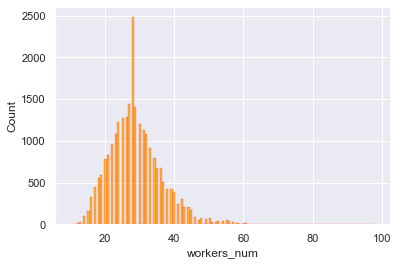

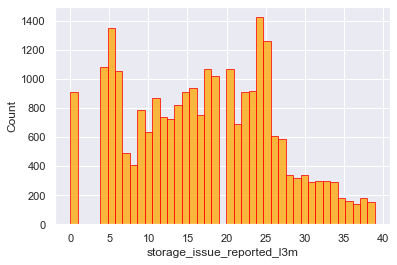

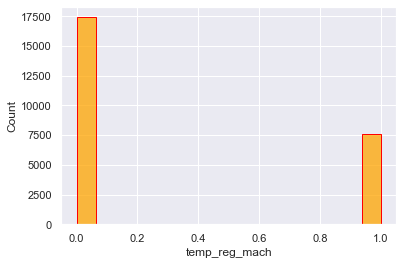

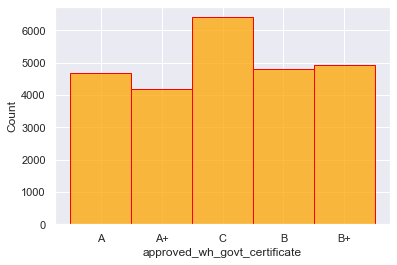

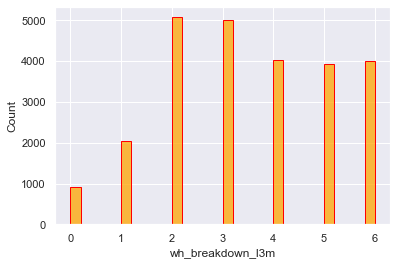

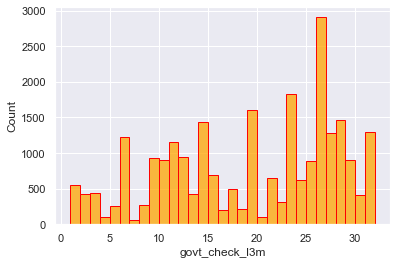

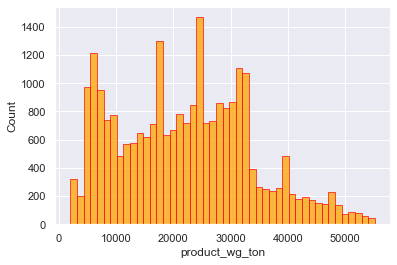

In [12]:
for i in df.columns:
    sns.histplot(df[i],color='orange', edgecolor='red')
#     plt.savefig(f'{i}.png')
    plt.show()

# Encoding
## Converting categorical variables Numerical Values

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


def Encode(col):
    for i in col:
        if type(df[i].values[1]) ==str:
            df[i]=le.fit_transform(df[i])            


In [14]:
Encode(df.columns)

# Checking Duplicated values

In [15]:
df.duplicated().sum()

0

## No more categorical values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int32  
 1   WH_capacity_size              25000 non-null  int32  
 2   zone                          25000 non-null  int32  
 3   WH_regional_zone              25000 non-null  int32  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int32  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

# Plotting Correlaton matrix

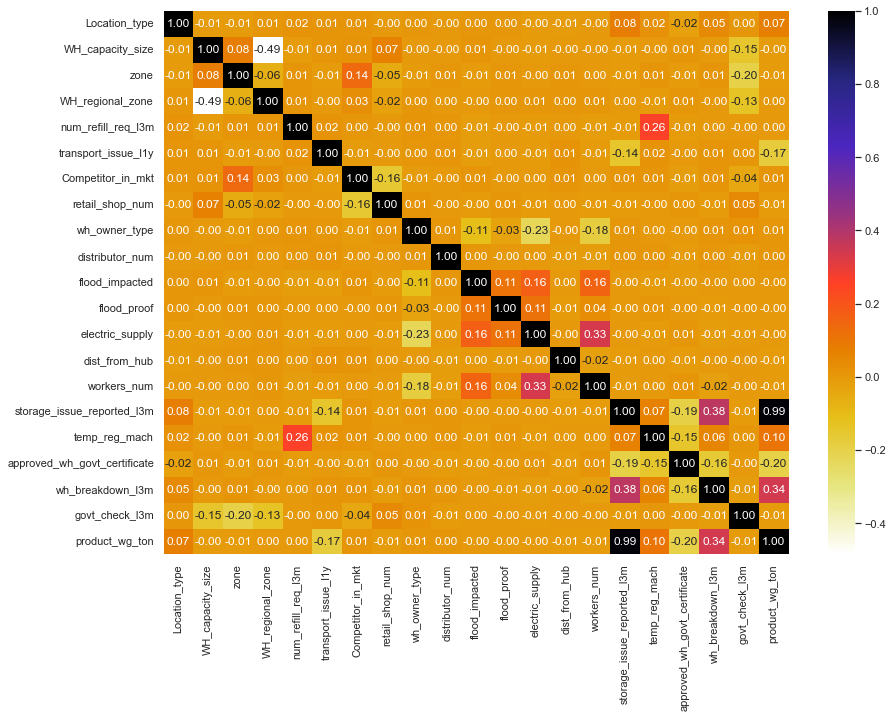

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=plt.cm.CMRmap_r)
# plt.savefig('Correlation_matrix_actual')
plt.show()

In [18]:
df.shape

(25000, 21)

# Checking Outliers

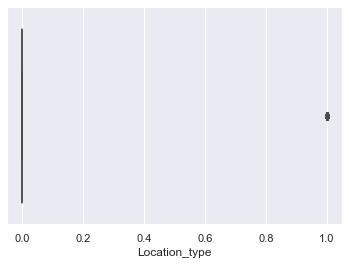

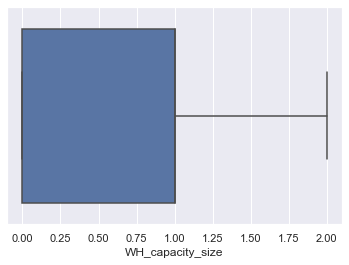

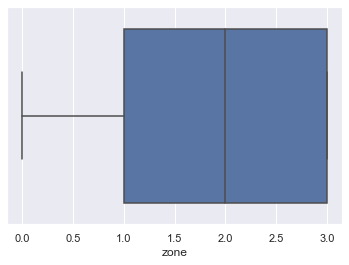

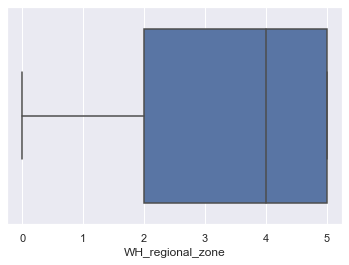

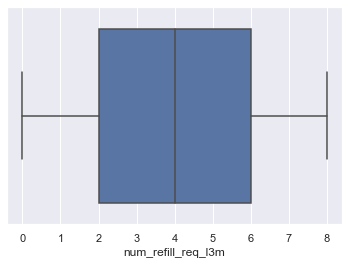

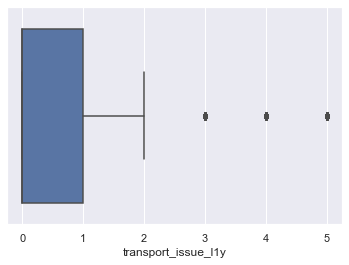

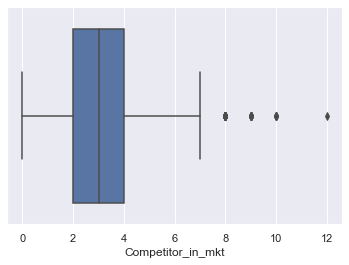

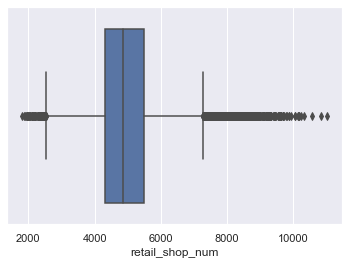

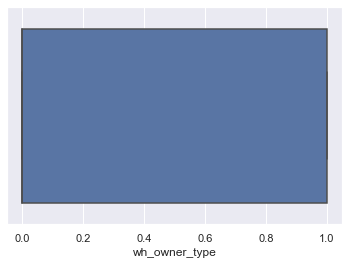

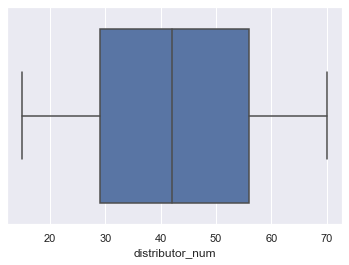

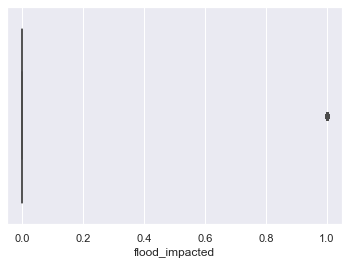

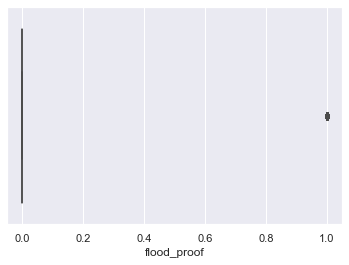

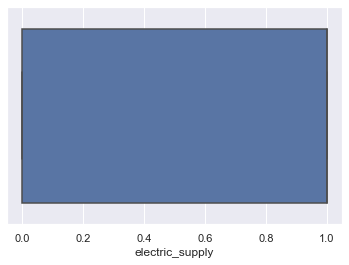

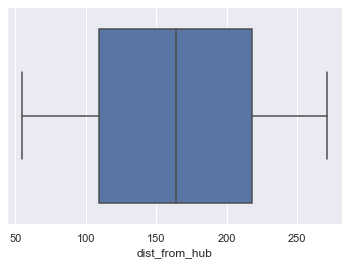

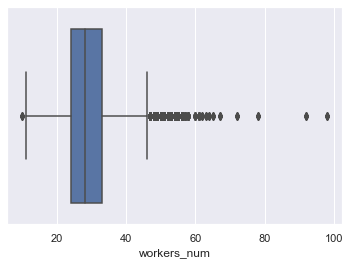

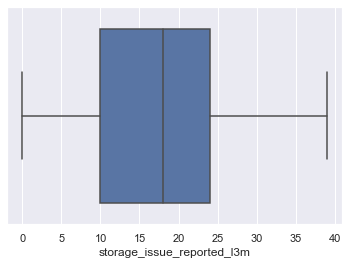

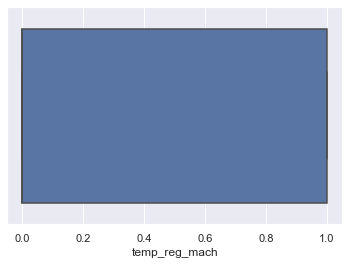

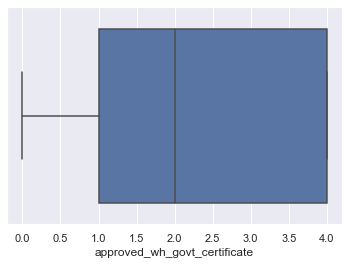

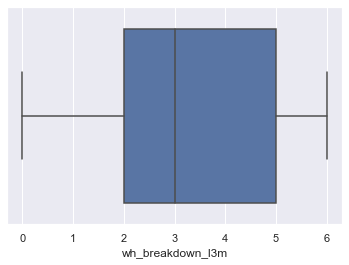

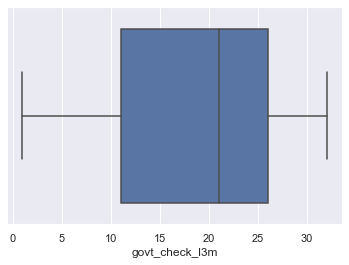

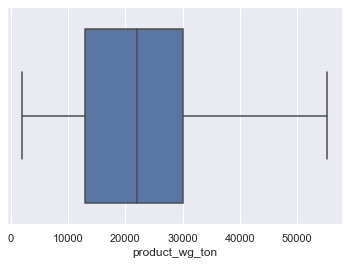

In [45]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

## There are True outliers in the worker number and needs to be considered.

# Scaling the values


In [21]:
x=df.drop('product_wg_ton',axis=1)
y=df['product_wg_ton']

# Building models

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=df.columns.values[:-1])
x_train.head()


x_test=ss.fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=df.columns.values[:-1])

## Scaling only xtrain and not entire dataset to avoid data leakage

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=ExtraTreesRegressor()
model4=RandomForestRegressor()
model5=AdaBoostRegressor()
model6=GradientBoostingRegressor()

In [26]:
l=[model1,model2,model3,model4,model5,model6]

r2score=[]
def models(x):
    for i in l:
        i.fit(x_train, y_train)    
        y_pred_train = i.predict(x_train)
        y_pred_test = i.predict(x_test)
        print(f"Result for {i}:")
        print("R2 score for training:", r2_score(y_train, y_pred_train))
        print("R2 score for testing :", r2_score(y_test, y_pred_test))
        r2score.append(r2_score(y_test, y_pred_test))
        print("Root mean Squared error :", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
        
        print('#-#'*40)

In [27]:
models(l)

Result for LinearRegression():
R2 score for training: 0.9768892411684231
R2 score for testing : 0.9776664036668545
Root mean Squared error : 1719.4593225534245
#-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-#
Result for DecisionTreeRegressor():
R2 score for training: 1.0
R2 score for testing : 0.9873419279768136
Root mean Squared error : 1294.4830144578955
#-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-#
Result for ExtraTreesRegressor():
R2 score for training: 1.0
R2 score for testing : 0.9928721981849344
Root mean Squared error : 971.382741069171
#-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-##-#
Result for RandomForestRegressor():
R2 score for training: 0.999043289054421
R2 score for testing : 0.9934129624800896
Root mean Squared error : 933.8081147261037
#-##-##-##-##-##-#

## RandomForestRegressor and GradientBoostingRegressor giving us the best r2 score with the least variance and least RMSE


# Hyper Parameter Tuning 


## For Random Forest Regressor


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =10, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=2,
                      n_estimators=77)

In [31]:
Final_model=RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=2,
                      n_estimators=77)

In [32]:
Final_model.fit(x_train, y_train)
y_pred_train = Final_model.predict(x_train)
y_pred_test = Final_model.predict(x_test)
print("R2 score for training:", r2_score(y_train, y_pred_train))
print("R2 score for testing :", r2_score(y_test, y_pred_test))
print("Root mean Squared error :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 score for training: 0.9985162974005168
R2 score for testing : 0.9934675167265619
Root mean Squared error : 929.9331469862688


## Root mean Squared error hasn't improved much after Hyper parameter tuning 

# For Gradient Boosting Regressor

In [33]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[20,50,100,150,200],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4,6,8],'subsample':[.5,.75,1],'random_state':[1]}
search=RandomizedSearchCV(estimator=GBR,param_distributions=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)

In [34]:
search.fit(x_train,y_train)
search.best_params_

{'subsample': 0.5,
 'random_state': 1,
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': 0.1}

In [35]:
Final_Gradient_model=GradientBoostingRegressor(subsample =1,
 random_state= 1,
 n_estimators= 50,
 max_depth= 6,
 learning_rate= 0.1)


In [36]:
Final_Gradient_model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=50, random_state=1,
                          subsample=1)

In [37]:
y_pred_train = Final_Gradient_model.predict(x_train)
y_pred_test = Final_Gradient_model.predict(x_test)
print("R2 score for training:", r2_score(y_train, y_pred_train))
print("R2 score for testing :", r2_score(y_test, y_pred_test))
print("Root mean Squared error :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 score for training: 0.9940658635690177
R2 score for testing : 0.9941016305240836
Root mean Squared error : 883.6465001969495


## RMSE further decreased form 918 to 882
# Thus, selecting GradientBoostingRegressor as the Final Model 

# Plotting R2 of various models

In [38]:
model=['LinearRegression','DecisionTreeRegressor','ExtraTreesRegressor','RandomForestRegressor','AdaBoostRegressor',
       'GradientBoostingRegressor']

plot=list(zip(model,r2score))
plot.sort(key= lambda x:x[0])
d=pd.DataFrame(plot)

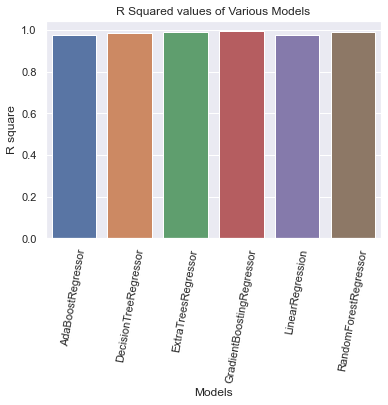

In [39]:
sns.barplot(x=d[0],y=d[1])
plt.xticks(rotation=80)
plt.title('R Squared values of Various Models')
plt.xlabel('Models')
plt.ylabel('R square')
plt.savefig('Final_model_r2.png')
plt.show()

In [40]:
# -----------------------------------------------------------------END----------------------------------------------------------